# Pneumonia Chest X-ray Prediction

### Importing Libraries

In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import random
import warnings
from mpl_toolkits.axes_grid1 import ImageGrid
warnings.simplefilter('ignore')

C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Data Preprocesing

In [13]:
normal = r'C:/Users/PC/Desktop/ML/Data/train/normal'
pneumonia = r'C:/Users/PC/Desktop/ML/Data/train/pneumonia'

In [41]:
def cargar_datos(ruta, etiqueta, nuevo_ancho, nuevo_alto):
    datos = []
    etiquetas = []
    for archivo in os.listdir(ruta):
        if archivo.endswith(".jpeg"):
            imagen = cv2.imread(os.path.join(ruta, archivo))
            imagen = cv2.resize(imagen, (nuevo_ancho, nuevo_alto))
            datos.append(imagen)
            etiquetas.append(etiqueta)
    return datos, etiquetas

nuevo_ancho = 100
nuevo_alto = 100

normal_d, etiquetas_normal = cargar_datos(normal, etiqueta=1, nuevo_ancho=nuevo_ancho, nuevo_alto=nuevo_alto)
pneumonia_d, etiquetas_pneumonia = cargar_datos(pneumonia, etiqueta=0, nuevo_ancho=nuevo_ancho, nuevo_alto=nuevo_alto)

In [42]:
data = normal_d + pneumonia_d
target = etiquetas_normal+etiquetas_pneumonia

In [43]:
X = np.array(data)
Y = np.array(target)

In [20]:
print(X.shape, Y.shape)

(5216, 100, 100, 3) (5216,)


In [21]:
pd.Series(Y).value_counts()

0    3875
1    1341
dtype: int64

### Exploratory Data Analysis

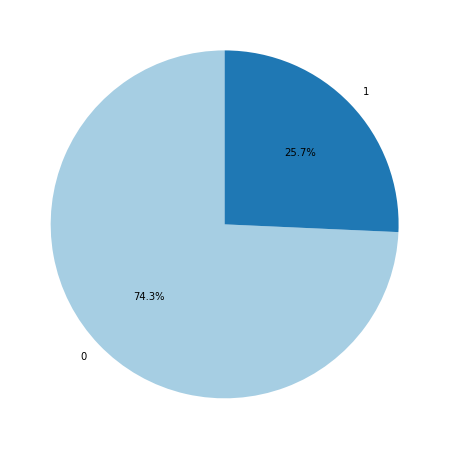

In [22]:
serie_etiquetas = pd.Series(Y)

conteo_etiquetas = serie_etiquetas.value_counts()
plt.figure(figsize = (10,8))
plt.pie(conteo_etiquetas, labels=conteo_etiquetas.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.show()

### Exploratory Data Analysis

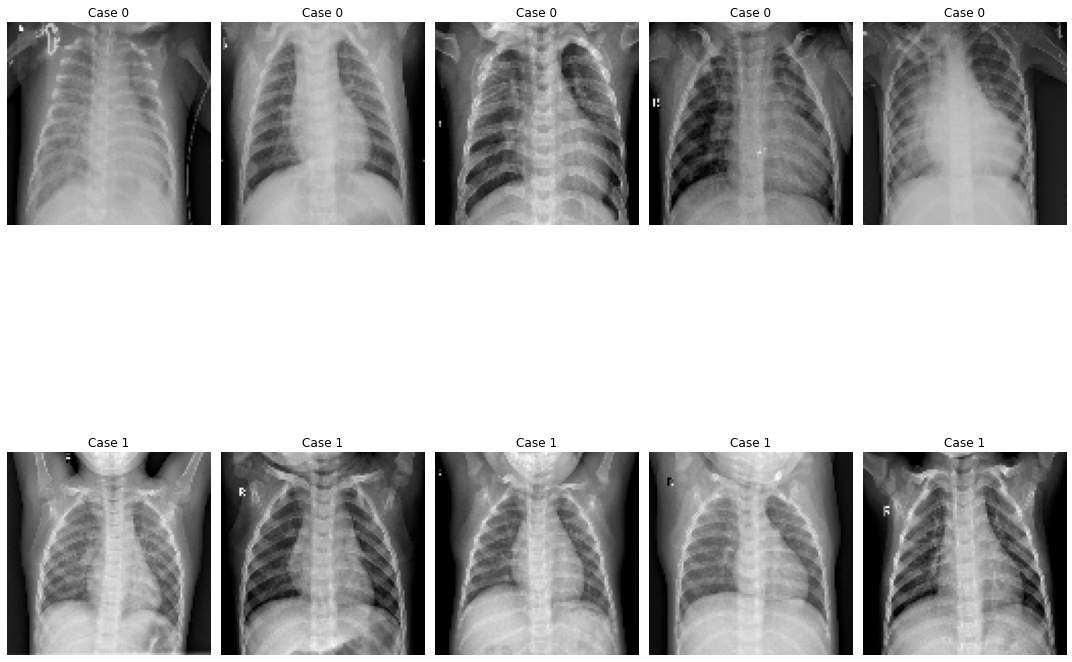

In [44]:
fig, axs = plt.subplots(2, 5, figsize=(15, 15))

for etiqueta in range(5):
    imagenes_etiqueta = [X[i] for i in range(len(Y)) if Y[i] == etiqueta]
    etiquetas_etiqueta = [Y[i] for i in range(len(Y)) if Y[i] == etiqueta]

    for i in range(min(5, len(imagenes_etiqueta))):
        row = etiqueta
        col = i

        axs[row, col].imshow(imagenes_etiqueta[i], cmap='viridis')
        axs[row, col].set_title(f'Case {etiquetas_etiqueta[i]}')

for ax in axs.flat:
    ax.axis('off')

plt.tight_layout()

plt.show()

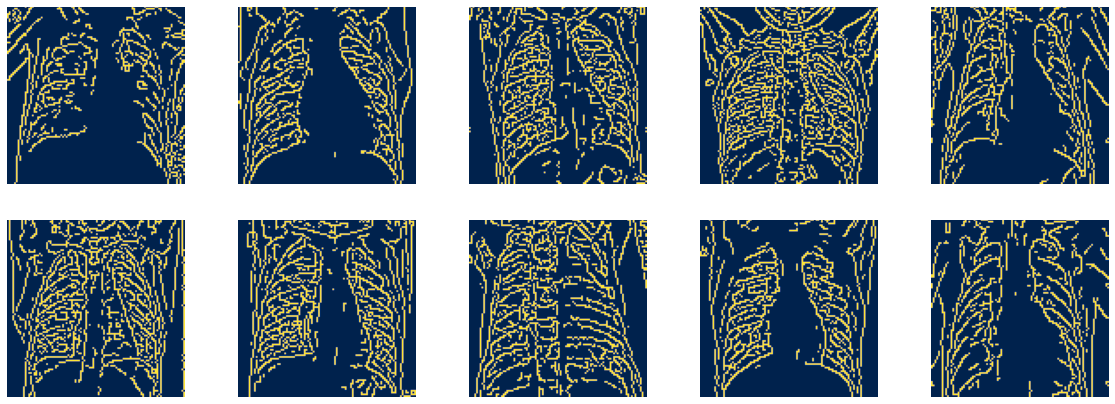

In [59]:
def visualize_images_canny(image_set):
    plt.figure(figsize=(20, 15))
    for i in range(10):
        random_image = random.choice(image_set)

        img_gray = cv2.cvtColor(random_image, cv2.COLOR_BGR2GRAY)
        edges = cv2.Canny(img_gray, 80, 100)

        plt.subplot(4, 5, i+1)
        plt.imshow(edges,  cmap='cividis')
        plt.axis('off')
        
    plt.show()
visualize_images_canny(X)   

### Modeling and Evaluation

In [60]:
X = X.reshape(X.shape[0], -1)
Y = target

In [61]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

### Train Test Split

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

### Logistic Regression

In [63]:
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)
logistic_model.score(X_train, y_train)
model_pred_L = logistic_model.predict(X_test)

print(classification_report(y_test, model_pred_L))
print("accuracy: ",accuracy_score(y_test, model_pred_L))
print("mean_absolute_error: ",mean_absolute_error(y_test, model_pred_L))
print("mean_squared_error: ",mean_squared_error(y_test, model_pred_L))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1145
           1       0.94      0.91      0.93       420

    accuracy                           0.96      1565
   macro avg       0.95      0.95      0.95      1565
weighted avg       0.96      0.96      0.96      1565

accuracy:  0.9603833865814696
mean_absolute_error:  0.03961661341853035
mean_squared_error:  0.03961661341853035


### Random Forest Classifier

In [64]:
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, y_train)
random_forest_model.score(X_train, y_train)
model_pred_R = random_forest_model.predict(X_test)

print(classification_report(y_test, model_pred_R))
print("accuracy: ",accuracy_score(y_test, model_pred_R))
print("mean_absolute_error: ",mean_absolute_error(y_test, model_pred_R))
print("mean_squared_error: ",mean_squared_error(y_test, model_pred_R))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1145
           1       0.94      0.88      0.91       420

    accuracy                           0.95      1565
   macro avg       0.95      0.93      0.94      1565
weighted avg       0.95      0.95      0.95      1565

accuracy:  0.952076677316294
mean_absolute_error:  0.04792332268370607
mean_squared_error:  0.04792332268370607


### Decision Tree Classifier

In [65]:
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)
decision_tree_model.score(X_train, y_train)
model_pred_T = decision_tree_model.predict(X_test)

print(classification_report(y_test, model_pred_T))
print("accuracy: ",accuracy_score(y_test, model_pred_T))
print("mean_absolute_error: ",mean_absolute_error(y_test, model_pred_T))
print("mean_squared_error: ",mean_squared_error(y_test, model_pred_T))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      1145
           1       0.79      0.78      0.78       420

    accuracy                           0.88      1565
   macro avg       0.85      0.85      0.85      1565
weighted avg       0.88      0.88      0.88      1565

accuracy:  0.8830670926517572
mean_absolute_error:  0.11693290734824281
mean_squared_error:  0.11693290734824281


### KNeighborsClassifier

In [66]:
model_NEG = KNeighborsClassifier(n_neighbors=5)
model_NEG.fit(X_train, y_train)
model_NEG.score(X_train, y_train)
model_NEG_Pred = model_NEG.predict(X_test)

print(classification_report(y_test, model_NEG_Pred))
print("accuracy: ",accuracy_score(y_test, model_NEG_Pred))
print("mean_absolute_error: ",mean_absolute_error(y_test, model_NEG_Pred))
print("mean_squared_error: ",mean_squared_error(y_test, model_NEG_Pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95      1145
           1       0.97      0.75      0.85       420

    accuracy                           0.93      1565
   macro avg       0.94      0.87      0.90      1565
weighted avg       0.93      0.93      0.92      1565

accuracy:  0.9265175718849841
mean_absolute_error:  0.07348242811501597
mean_squared_error:  0.07348242811501597


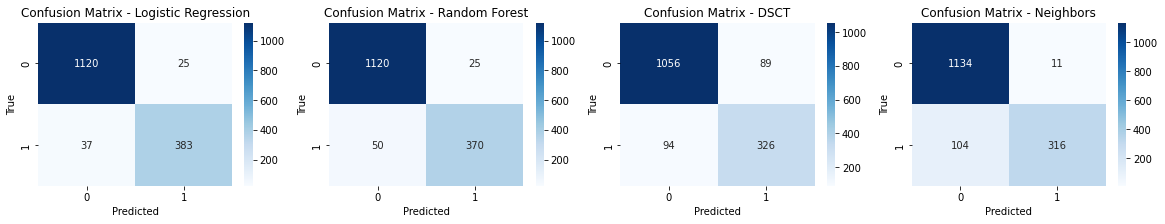

In [67]:
RLOG = confusion_matrix(y_test, model_pred_L)
RMFC = confusion_matrix(y_test, model_pred_R)
DSCT = confusion_matrix(y_test, model_pred_T)
NEG = confusion_matrix(y_test, model_NEG_Pred)

fig, axes = plt.subplots(1, 4, figsize=(20, 3))

sns.heatmap(RLOG, annot=True, cmap='Blues', fmt='g', ax=axes[0])
axes[0].set_title('Confusion Matrix - Logistic Regression')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('True')

sns.heatmap(RMFC, annot=True, cmap='Blues', fmt='g', ax=axes[1])
axes[1].set_title('Confusion Matrix - Random Forest')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('True')

sns.heatmap(DSCT, annot=True, cmap='Blues', fmt='g', ax=axes[2])
axes[2].set_title('Confusion Matrix - DSCT')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('True')


sns.heatmap(NEG, annot=True, cmap='Blues', fmt='g', ax=axes[3])
axes[3].set_title('Confusion Matrix - Neighbors')
axes[3].set_xlabel('Predicted')
axes[3].set_ylabel('True')

plt.show()

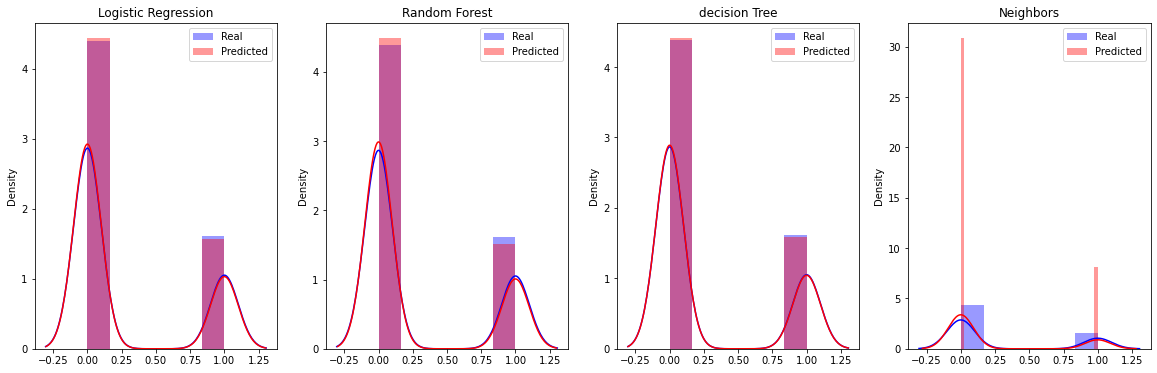

In [68]:
fig, ax = plt.subplots(1, 4, figsize=(20, 6))

sns.distplot(y_test, label='Real', ax=ax[0], color = 'Blue')
sns.distplot(model_pred_L, label='Predicted', ax=ax[0],  color = 'red')

sns.distplot(y_test, label='Real', ax=ax[1], color = 'Blue')
sns.distplot(model_pred_R, label='Predicted', ax=ax[1], color = 'red')

sns.distplot(y_test, label='Real', ax=ax[2], color = 'Blue')
sns.distplot(model_pred_T, label='Predicted', ax=ax[2], color = 'red')

sns.distplot(y_test, label='Real', ax=ax[3], color = 'Blue')
sns.distplot(model_NEG_Pred, label='Predicted', ax=ax[3], color = 'red')


ax[0].set_title('Logistic Regression')
ax[1].set_title('Random Forest')
ax[2].set_title('decision Tree')
ax[3].set_title('Neighbors')

ax[0].legend()
ax[1].legend()
ax[2].legend()
ax[3].legend()
plt.show()